Next word prediction models have numerous applications across various industries. For instance, when you type a message on your phone, they suggest the next word to make typing faster and more efficient. Similarly, search engines provide predictive search suggestions as you begin typing in the search bar. By anticipating what we might write or search for, these models enhance communication speed and accuracy.

To build a Next Word Prediction model:

1. Start by collecting a diverse dataset of text documents, 
2. Preprocess the data by cleaning and tokenizing it, 
3. Prepare the data by creating input-output pairs, 
4. Engineer features such as word embeddings, 
5. Select an appropriate model like an LSTM, 
6. Train the model on the dataset while adjusting hyperparameters,
7. Improve the model by experimenting with different techniques and architectures.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

## Read the text file

In [3]:
with open('sherlock-holm.es_stories_plain-text_advs.txt', 'r', encoding='utf-8') as file:
    text = file.read()

## Tokenize the text to create a sequence of words

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [8]:
import pickle
with open("tokenizer.pkl", "wb") as file:
    pickle.dump(tokenizer, file)

## Create input-output pairs

In [10]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

## Applying padding to the input sequences to have equal length

In [12]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

## Split the sequences into input and output

In [14]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

## Convert the output to one-hot encode vectors

In [16]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

## Build a neural network architecture to train the model

In [18]:

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(200, return_sequences=True))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=125, verbose=1)

C:\Users\Krish\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 72s 22ms/step - accuracy: 0.0575 - loss: 6.6154
Epoch 2/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - accuracy: 0.0971 - loss: 5.7489
Epoch 3/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - accuracy: 0.1204 - loss: 5.4005
Epoch 4/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - accuracy: 0.1388 - loss: 5.1721
Epoch 5/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 64s 21ms/step - accuracy: 0.1482 - loss: 4.9630
Epoch 6/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - accuracy: 0.1569 - loss: 4.7639
Epoch 7/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.1627 - loss: 4.6028
Epoch 8/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - accuracy: 0.1701 - loss: 4.4406
Epoch 9/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 64s 21ms/step - accuracy: 0.1766 - loss: 4.2930
Epoch 10/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - accuracy: 0.1855 - loss: 4.1564
Epoch 11/125
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.1928 - loss: 4.02

In [20]:

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 17, 100)             │         820,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 17, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 150)                 │         210,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8200)                │       1,238,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,528,802 (28.72 MB)

 Trainable params: 2,509,600 (9.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,019,202 (19.15 MB)

None


# Testing

In [22]:
seed_text = "I will leave if they"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
I will leave if they had been disturbed


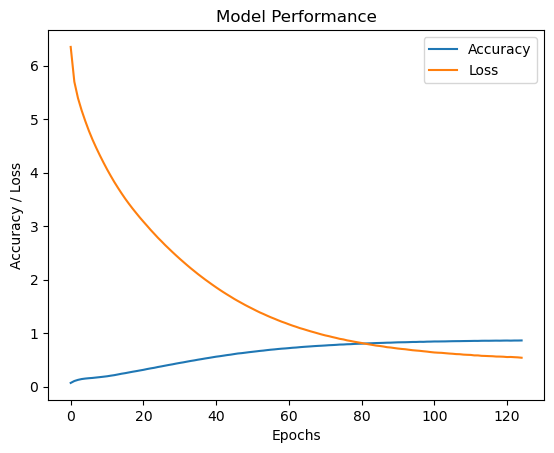

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [26]:
model.save("next_word_model.h5")


In [28]:
model.save("next_word_model.keras")
